In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Read the data
df = pd.read_csv('Mall_Customers.csv')

In [3]:
# Print the first 5 rows of the data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Get the shape of the data
df.shape

(200, 5)

In [5]:
# Check the data types of the variables
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [70]:
# Check missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [71]:
# Drop the CustomerID column
df.drop('CustomerID', axis=1, inplace=True)

In [72]:
# Get the most important features
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

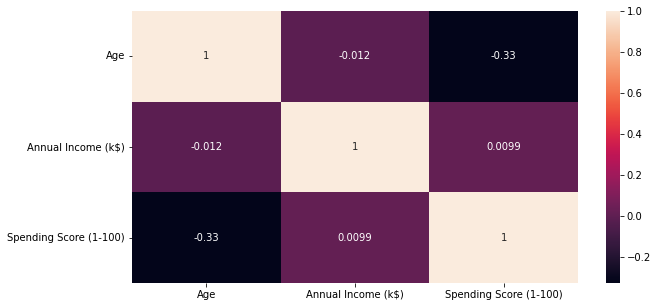

In [73]:
# Plot the correlation matrix
sns.heatmap(df.corr(), annot=True)

In [74]:
# Rename column
df.rename(columns={'Annual Income (k$)': 'annual_income', 'Spending Score (1-100)': 'spending_score'}, inplace=True)

In [75]:
# Only get the most correlated features
df = df[['annual_income', 'spending_score']]

In [76]:
# Show the first 5 rows of the data
df.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


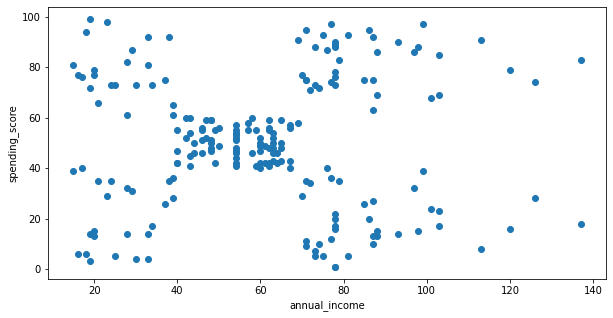

In [77]:
# Plot the data
plt.scatter(df['annual_income'], df['spending_score'])
plt.xlabel('annual_income')
plt.ylabel('spending_score')
plt.show()

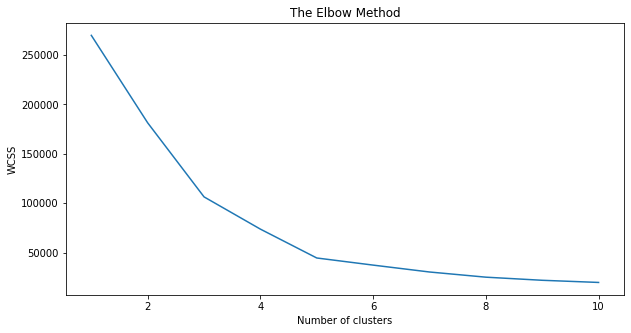

In [78]:
# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [79]:
# Fit the K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df)

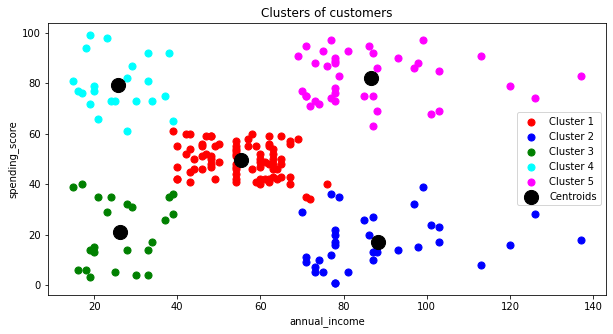

In [80]:
# Plot the clusters
plt.scatter(df[y_kmeans == 0]['annual_income'], df[y_kmeans == 0]['spending_score'], s=50, c='red', label='Cluster 1')
plt.scatter(df[y_kmeans == 1]['annual_income'], df[y_kmeans == 1]['spending_score'], s=50, c='blue', label='Cluster 2')
plt.scatter(df[y_kmeans == 2]['annual_income'], df[y_kmeans == 2]['spending_score'], s=50, c='green', label='Cluster 3')
plt.scatter(df[y_kmeans == 3]['annual_income'], df[y_kmeans == 3]['spending_score'], s=50, c='cyan', label='Cluster 4')
plt.scatter(df[y_kmeans == 4]['annual_income'], df[y_kmeans == 4]['spending_score'], s=50, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('annual_income')
plt.ylabel('spending_score')
plt.legend()
plt.show()

In [81]:
# Add new column to the data
df['Cluster'] = y_kmeans

In [82]:
# Show the first 5 rows of the data
df.head()

,annual_income,spending_score,Cluster
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


In [83]:
# Data type of the Cluster column
df['Cluster'].dtype

dtype('int32')

In [84]:
df['Cluster'].unique()

array([2, 3, 0, 4, 1])

In [85]:
# Serializing the model
import pickle
pickle.dump(kmeans, open('model.pkl', 'wb'))